In [1]:
import pandas as pd

# Load the Zoo dataset
file_path = "D:\Excelr\Data Science\Data Science Assignment\KNN\KNN\Zoo.csv"
zoo_data = pd.read_csv(file_path)
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


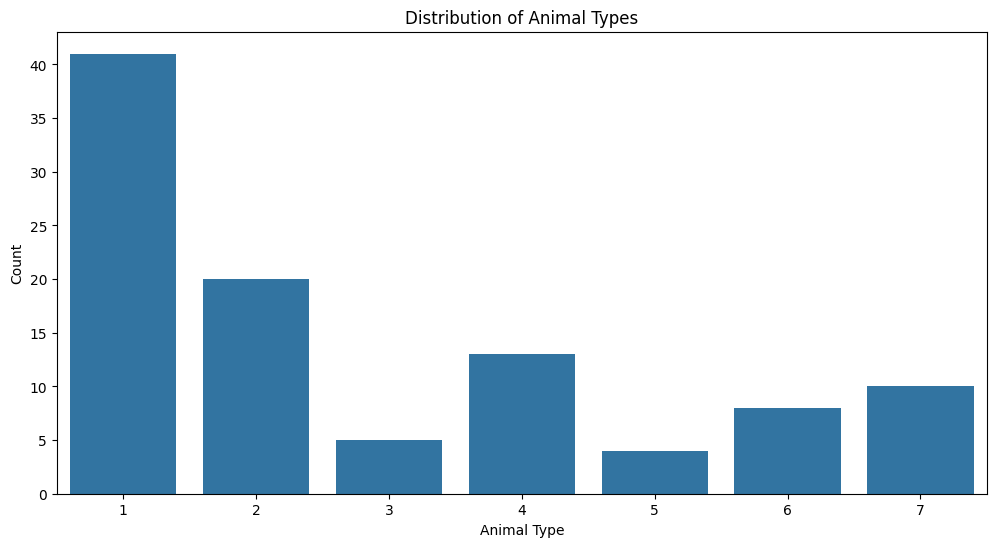

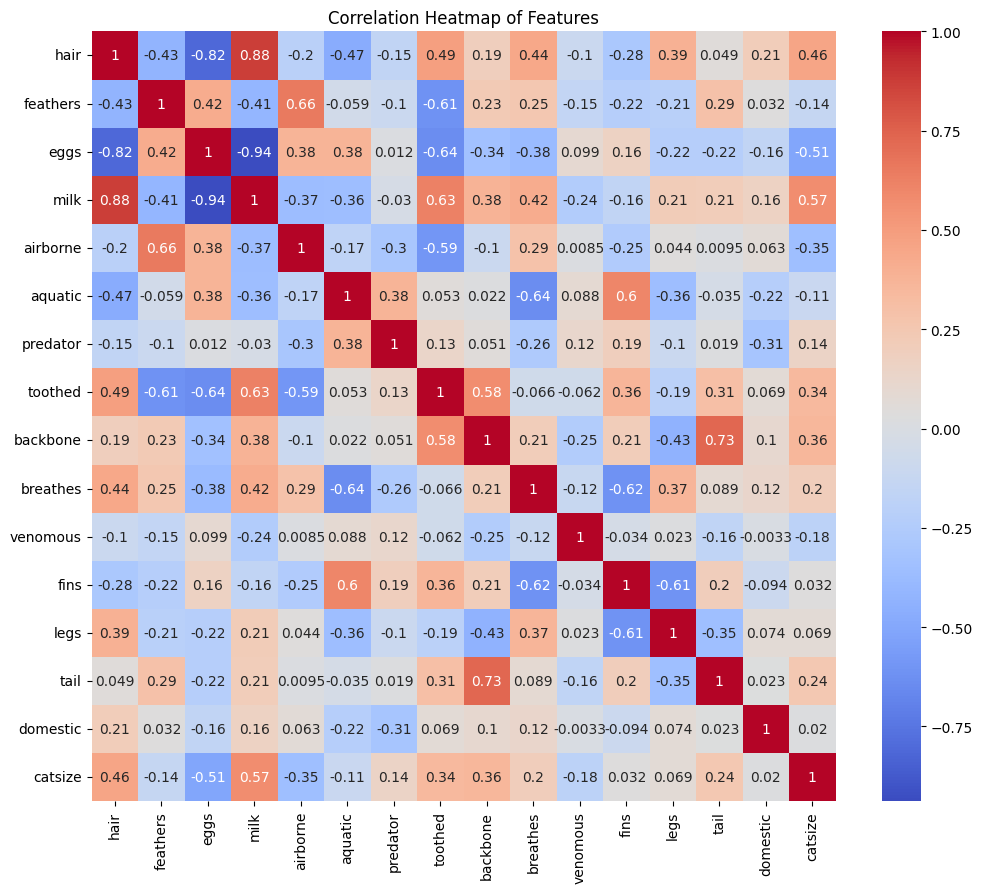

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# Plot the distribution of the target variable 'type'
sns.countplot(x='type', data=zoo_data)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()
# Correlation heatmap of the features to check relationships
plt.figure(figsize=(12, 10))
sns.heatmap(zoo_data.drop(['animal name', 'type'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [3]:
# missing values
missing_values = zoo_data.isnull().sum()
# basic statistics to spot potential outliers
statistics_summary = zoo_data.describe()

missing_values, statistics_summary

(animal name    0
 hair           0
 feathers       0
 eggs           0
 milk           0
 airborne       0
 aquatic        0
 predator       0
 toothed        0
 backbone       0
 breathes       0
 venomous       0
 fins           0
 legs           0
 tail           0
 domestic       0
 catsize        0
 type           0
 dtype: int64,
              hair    feathers        eggs        milk    airborne     aquatic  \
 count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
 mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
 std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
 min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
 75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
 max 

In [4]:
from sklearn.model_selection import train_test_split

# Drop 'animal name' as it's not useful for classification and separate features from the target
X = zoo_data.drop(['animal name', 'type'], axis=1)
y = zoo_data['type']
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 16), (21, 16), (80,), (21,))

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# try different values of K to find the best one
k_values = range(1, 11)
accuracy_scores = []
# Train and evaluate KNN for each K value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
# best K
best_k = k_values[np.argmax(accuracy_scores)]
best_k, max(accuracy_scores)

(1, 1.0)

In [7]:
# Train the KNN classifier with the best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
# predictions on the test set
y_pred = knn.predict(X_test)
# Classification report
classification_rep = classification_report(y_test, y_pred)
classification_rep

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        12\n           2       1.00      1.00      1.00         2\n           3       1.00      1.00      1.00         1\n           4       1.00      1.00      1.00         2\n           6       1.00      1.00      1.00         3\n           7       1.00      1.00      1.00         1\n\n    accuracy                           1.00        21\n   macro avg       1.00      1.00      1.00        21\nweighted avg       1.00      1.00      1.00        21\n'

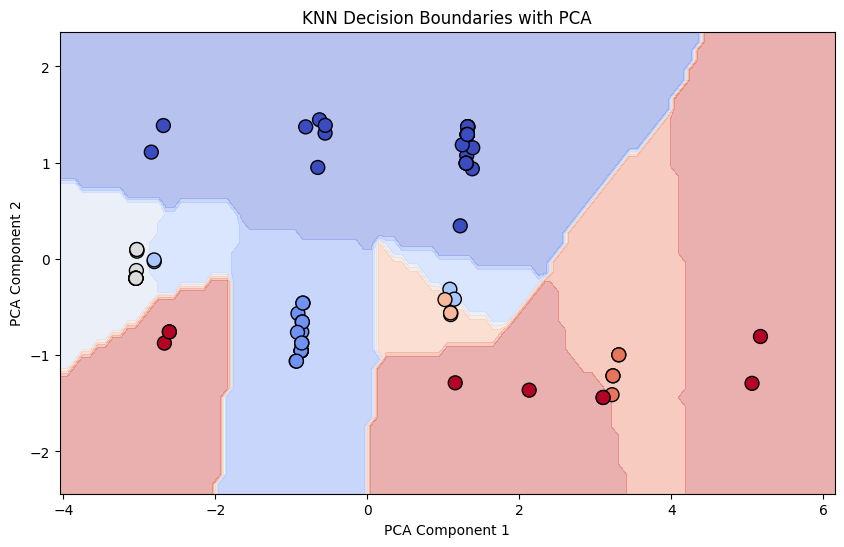

In [6]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Train the KNN classifier on the reduced data
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)
# mesh grid to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
# Predict class for each point in the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundaries and the training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', s=100, cmap='coolwarm')
plt.title('KNN Decision Boundaries with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()